In [1]:
from scipy import stats
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## WS rank test over edu and non-edu

In [3]:
# read the file
import pandas as pd 

df_count_control = pd.read_csv("../dataset_archive/frame_control_count_who.csv",sep = "\t")
df_count_edu = pd.read_csv("../dataset_archive/frame_edu_count_who.csv",sep = "\t")
print(len(df_count_edu))
print(len(df_count_control))
print(len(df_count_edu['edu_domain'].unique()))
print(len(df_count_control['control_domain'].unique()))


17975
17975
17975
17975


In [4]:
# get the rank of domain

# df_edu_no_edu = pd.read_csv("../resource/available-control-urls.txt",names = ['edu_domain','control_domain','non-url'], sep = "\t")
# df_edu_no_edu.head()
# df_edu_no_edu['rank'] = range(len(df_edu_no_edu))
# df_edu_no_edu.head()

df_websites_rank = pd.read_csv("../resource/url_index.txt", sep = "\t")
df_websites_rank.head()
# df_dict = dict(zip(df_edu_no_edu['edu'].to_list(), df_edu_no_edu['non-edu'].to_list()))


,edu_url,edu_url_index,control_url,control_url_index
0,jetaanc.org,2856677,judysoncherry.com,2856678
1,concordsch.vic.edu.au,6771379,alexmac.biz,6771380
2,lincoln.ox.ac.uk,361991,umista.ca,361992
3,gosoutheast.com,578597,ncip.gov.ph,578598
4,lalumiere.org,2857735,ashland.k12.or.us,2857736


In [5]:
# change the name

df_websites_rank.rename(columns={"edu_url":"edu_domain", "control_url":"control_domain"}, inplace=True)
df_count_edu['edu_domain'] = df_count_edu['edu_domain'].replace(".edu.tw","edu.tw")
df_count_edu['edu_domain'] = df_count_edu['edu_domain'].replace(".schools.nsw.edu.au","schools.nsw.edu.au")
print(len(df_websites_rank['edu_domain'].unique()))
print(len(df_websites_rank['control_domain'].unique()))

17975
17975


In [6]:
set(df_websites_rank["edu_domain"].unique()) - set(df_count_edu['edu_domain'].unique())

set()

In [7]:
set(df_count_edu['edu_domain'].unique()) - set(df_websites_rank["edu_domain"].unique())

set()

In [8]:
df_merge_edu = df_websites_rank.merge(df_count_edu, on="edu_domain", how="inner")
df_merge_edu.head()
print(len(df_merge_edu))

17975


In [9]:
df_count_control['control_domain'] = df_count_control['control_domain'].replace(["no","psychcom","vis-cs.umass.edu","wmysite.com"],["www.no","psychwww.com","vis-www.cs.umass.edu","wwww.mysite.com"])
df_merge_control = df_websites_rank.merge(df_count_control, on = "control_domain", how = "inner")
df_merge_control.head()
print(len(df_merge_control))

17975


In [10]:
set(df_websites_rank["control_domain"].unique()) - set(df_count_control['control_domain'].unique())

set()

In [11]:
set(df_count_control['control_domain'].unique()) -  set(df_websites_rank["control_domain"].unique())

set()

In [12]:
df_merge_all = df_merge_edu.merge(df_merge_control, on = "edu_domain",how = "inner").dropna().sort_values(by="edu_url_index_x")

df_merge_all = df_merge_all.rename(columns={'edu_url_index_x':'edu_domain_rank','control_domain_x':'control_domain',"control_url_index_x":"control_domain_rank"})

namelist = ['edu_domain','control_domain','edu_domain_rank','control_domain_rank','tracker_2016_x','tracker_2016_y','tracker_2017_x','tracker_2017_y','tracker_2018_x',\
'tracker_2018_y','tracker_2019_x','tracker_2019_y','tracker_2020_x','tracker_2020_y','tracker_2021_x','tracker_2021_y']
df_merge_all[namelist].to_csv("merge_all_who.csv",index = None)

df_merge_all.head()


,edu_domain,edu_domain_rank,control_domain,control_domain_rank,tracker_2012_x,tracker_2013_x,tracker_2014_x,tracker_2015_x,tracker_2016_x,tracker_2017_x,...,tracker_2012_y,tracker_2013_y,tracker_2014_y,tracker_2015_y,tracker_2016_y,tracker_2017_y,tracker_2018_y,tracker_2019_y,tracker_2020_y,tracker_2021_y
7934,slate.com,251,nbcnews.com,252,6,6,5,7,6,4,...,5,8,5,2,3,3,3,2,1,1
1508,purdue.edu,407,google.com.au,408,3,3,3,2,2,1,...,0,0,0,1,1,0,1,1,1,1
3281,timeshighereducation.com,416,epa.gov,417,0,4,4,1,1,4,...,2,2,2,4,4,3,2,1,2,1
3578,sciencedaily.com,546,blog.twitter.com,547,7,0,3,10,0,5,...,12,11,2,2,2,2,2,2,2,2
11127,coursera.org,582,katyperry.com,583,0,1,1,0,2,2,...,4,9,6,7,8,7,6,6,6,0


In [13]:
print(len(df_merge_all['edu_domain'].unique()))
print(len(df_merge_all['control_domain'].unique()))
print(len(df_merge_all))

17975
17975
17975


In [13]:
# df_merge_all = df_merge_all.astype({'edu_url_index_x': 'int32', "control_url_index_x": "int32"})
# df_merge_all.head()
# df_merge_all.to_csv("temp.csv")

# analyse what happens to 2017 year


In [14]:
from sklearn.model_selection import train_test_split
import numpy as np 
df_merge_all["2017_gap"] = df_merge_all['tracker_2017_x'] - df_merge_all['tracker_2017_y']
df_merge_all["2017_gap"].describe()
# df_merge_all[df_merge_all['2017_gap'] == 129]
# df_merge_all = df_merge_all.drop(1971)
df_merge_all = df_merge_all.sample(frac=1)
test1 = df_merge_all[:int(len(df_merge_all) * 0.25)]
test2 = df_merge_all[int(len(df_merge_all) * 0.25):int(len(df_merge_all) * 0.50)]
test3 = df_merge_all[int(len(df_merge_all) * 0.50):int(len(df_merge_all) * 0.75)]
test4 = df_merge_all[int(len(df_merge_all) * 0.75):]



In [15]:
stats.wilcoxon(test1['tracker_2017_x'], test1['tracker_2017_y'])
stats.wilcoxon(test2['tracker_2017_x'], test2['tracker_2017_y'])
stats.wilcoxon(test3['tracker_2017_x'], test3['tracker_2017_y'])
stats.wilcoxon(test4['tracker_2017_x'], test4['tracker_2017_y'])

WilcoxonResult(statistic=3325381.5, pvalue=0.019948439267828764)

In [16]:

for i in range(0,13000,1000):
    print(i,stats.wilcoxon(df_merge_all["tracker_2016_x"][i:i + 1000], df_merge_all['tracker_2016_y'][i:i + 1000]))

0 WilcoxonResult(statistic=151191.0, pvalue=0.023943629940420694)
1000 WilcoxonResult(statistic=161997.0, pvalue=0.023807804522717222)
2000 WilcoxonResult(statistic=169657.5, pvalue=0.6856314272729773)
3000 WilcoxonResult(statistic=171333.0, pvalue=0.22159441005505476)
4000 WilcoxonResult(statistic=164291.5, pvalue=0.05272799793050578)
5000 WilcoxonResult(statistic=157832.0, pvalue=0.05020983161359525)
6000 WilcoxonResult(statistic=158426.0, pvalue=0.12681527656691138)
7000 WilcoxonResult(statistic=171299.5, pvalue=0.6000593758541464)
8000 WilcoxonResult(statistic=165378.5, pvalue=0.3031896029340395)
9000 WilcoxonResult(statistic=168445.5, pvalue=0.16099687955711783)
10000 WilcoxonResult(statistic=162311.5, pvalue=0.5144803076108093)
11000 WilcoxonResult(statistic=162941.5, pvalue=0.618994714230384)
12000 WilcoxonResult(statistic=164425.0, pvalue=0.3822833201586022)


In [17]:
# df_merge_all = df_merge_all.drop(4989)

df_merge_all["2016_gap"] = df_merge_all['tracker_2016_x'] - df_merge_all['tracker_2016_y']
df_merge_all["2016_gap"].describe()


count    17975.000000
mean        -0.193880
std          2.933836
min        -18.000000
25%         -2.000000
50%          0.000000
75%          2.000000
max         13.000000
Name: 2016_gap, dtype: float64

In [18]:
df_merge_all["2016_gap"].describe()

count    17975.000000
mean        -0.193880
std          2.933836
min        -18.000000
25%         -2.000000
50%          0.000000
75%          2.000000
max         13.000000
Name: 2016_gap, dtype: float64

In [19]:
# print(df_merge_all[df_merge_all['2017_gap'] > 10])
# df_merge_all_remove = df_merge_all[df_merge_all['2017_gap'] >= 10]
# print(len(df_merge_all_remove))
# df_merge_all = df_merge_all[df_merge_all['2017_gap'] < 10]
# df_merge_all_remove.to_csv("remove_all.csv",index = None)
# temp = pd.read_csv("../dataset_archive/edu_archive_ali_all_2017.csv")
# temp[temp.url.isin(df_merge_all['edu_domain'])].to_csv("temp.csv")

In [19]:
df_merge_all["2017_gap"] = df_merge_all['tracker_2017_x'] - df_merge_all['tracker_2017_y']
df_merge_all["2017_gap"].describe()

count    17975.000000
mean        -0.092907
std          2.997429
min        -20.000000
25%         -2.000000
50%          0.000000
75%          2.000000
max         15.000000
Name: 2017_gap, dtype: float64

In [20]:

df_merge_all["2016_gap"] = df_merge_all['tracker_2016_x'] - df_merge_all['tracker_2016_y']
df_merge_all["2016_gap"].describe()


count    17975.000000
mean        -0.193880
std          2.933836
min        -18.000000
25%         -2.000000
50%          0.000000
75%          2.000000
max         13.000000
Name: 2016_gap, dtype: float64

# Calculate WS-rank 

In [21]:
stat = []
p_value = []
z_value = []
import scipy 

for year in range(2012,2022):
    
    result = stats.wilcoxon(df_merge_all[f'tracker_{year}_x'], df_merge_all[f'tracker_{year}_y'],method="approx")
    # z = abs(scipy.stats.norm.ppf(result.pvalue/2))
    print(round(result.zstatistic, 2))
    z_value.append(round(result.zstatistic, 2))
    stat.append(result.statistic)
    p_value.append(float("%.2g" % result.pvalue))

-19.66
-15.6
-14.32
-10.95
-6.52
-1.84
-4.33
-8.59
-9.21
-11.45


[5.2e-86, 6.8e-55, 1.6e-46, 6.7e-28, 7.1e-11, 0.066, 1.5e-05, 8.7e-18, 3.2e-20, 2.3e-30]


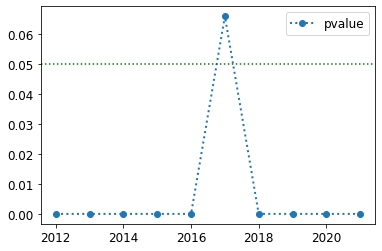

In [22]:
print(p_value)
years = list(range(2012,2022))
df_result = pd.DataFrame({"year": years, "statistic": stat, "pvalue": p_value,"zvalue": z_value})
df_result[['year','statistic','pvalue','zvalue']].to_csv("p_values_ws.csv",index = None)
plt.plot(df_result['year'],df_result['pvalue'],marker='o',label = "pvalue", linestyle=':',linewidth = 2)
# plt.plot(df_result['year'],df_result['statistic'],marker='o',label = "statistic", linestyle=':',linewidth = 2,color = "red")
plt.axhline(y = 0.05, color = 'green', linestyle = ':')
plt.legend()
plt.savefig("../images/section4/WS_test_who.png",dpi = 200)
# plt.savefig("../images/section4/WS_test_all.png",dpi = 200)

# draw figure

In [23]:
df_list = []
for year in range(2012,2022):
    df_year = df_merge_all[['edu_domain',f'tracker_{year}_x']]
    df_year["year"] = [str(year)]*len(df_year)
    df_year.columns = ['edu_domain',"trackers","year"]
    df_list.append(df_year)

df_draw = pd.concat(df_list)
# df_2013
df_draw

/tmp/ipykernel_3601324/101805713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year["year"] = [str(year)]*len(df_year)
/tmp/ipykernel_3601324/101805713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year["year"] = [str(year)]*len(df_year)
/tmp/ipykernel_3601324/101805713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,edu_domain,trackers,year
11991,ceiich.unam.mx,1,2012
16906,ftschool.org,0,2012
3045,pcdazero.it,3,2012
17838,musikurlaub.com,1,2012
11115,stiwl.de,0,2012
...,...,...,...
6721,wcniradio.org,3,2021
6364,ringwoodsc.vic.edu.au,5,2021
9936,history.rice.edu,5,2021
11870,21.edu.ar,4,2021


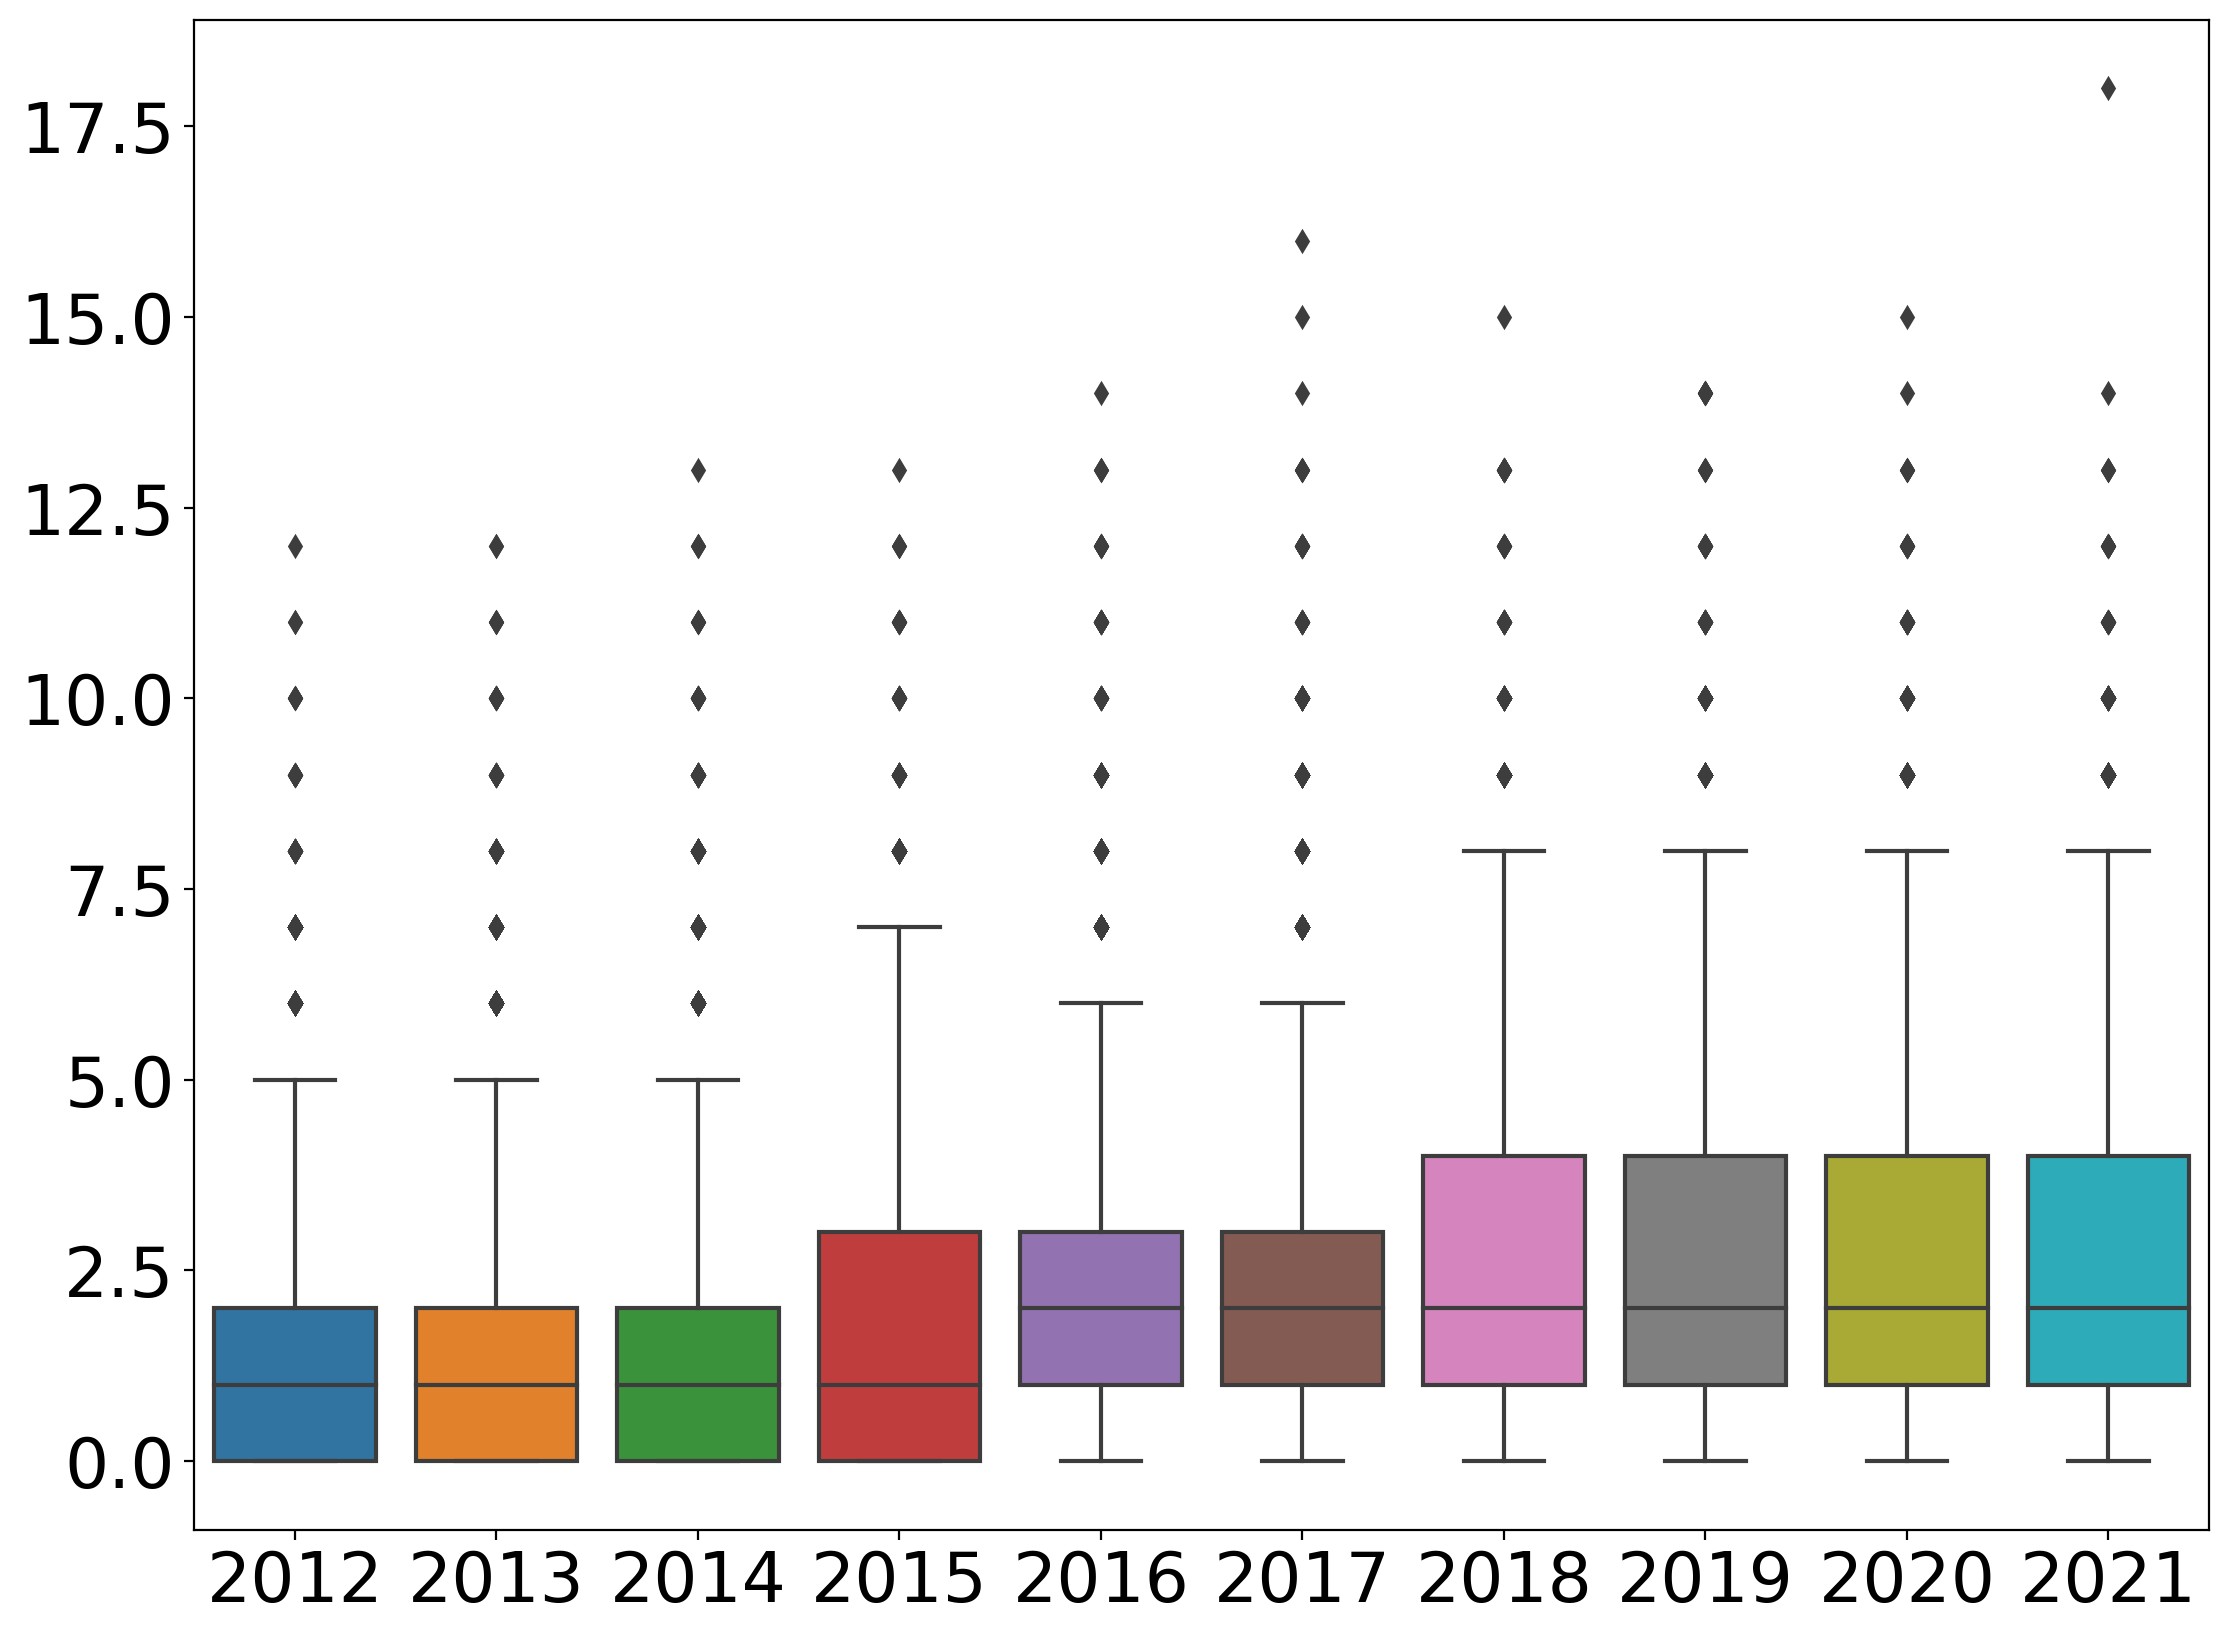

In [24]:
# Import Data
import seaborn  as sns

# Draw Plot
plt.figure(figsize=(13,10), dpi= 200)
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
g1 = sns.boxplot(x='year', y='trackers', data=df_draw, notch=False)
g1.set(xlabel = None)
g1.set(ylabel = None)
# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    print(medians_dict)
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#median : "+str(medians_dict[xticklabel]), horizontalalignment='center', fontdict={'size':8}, color='white')
# add_n_obs(df_draw,group_col='year',y='trackers')    

# Decoration
# plt.title('Box Plot of Tracker Numbers in Each year', fontsize=22)
# plt.ylim(10, 40)
plt.savefig("../images/section4/boxplot_edu.png",dpi = 600)
plt.show()


In [25]:
df_list_control = []
for year in range(2012,2022):
    df_year = df_merge_all[['control_domain',f'tracker_{year}_y']]
    df_year["year"] = [str(year)]*len(df_year)
    df_year.columns = ['control_domain',"trackers","year"]
    df_list_control.append(df_year)

df_draw_control = pd.concat(df_list_control)
# df_2013
df_draw_control

/tmp/ipykernel_3601324/1471902089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year["year"] = [str(year)]*len(df_year)
/tmp/ipykernel_3601324/1471902089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year["year"] = [str(year)]*len(df_year)
/tmp/ipykernel_3601324/1471902089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,control_domain,trackers,year
11991,azymuth.net,2,2012
16906,brasserieblazer.nl,0,2012
3045,starcanada.techwell.com,2,2012
17838,pariscapitaledelacreation.com,0,2012
11115,savourandsave.com,6,2012
...,...,...,...
6721,librairie-voyage.com,2,2021
6364,silentcinema.com,0,2021
9936,histmed.org,2,2021
11870,bff.fm,1,2021


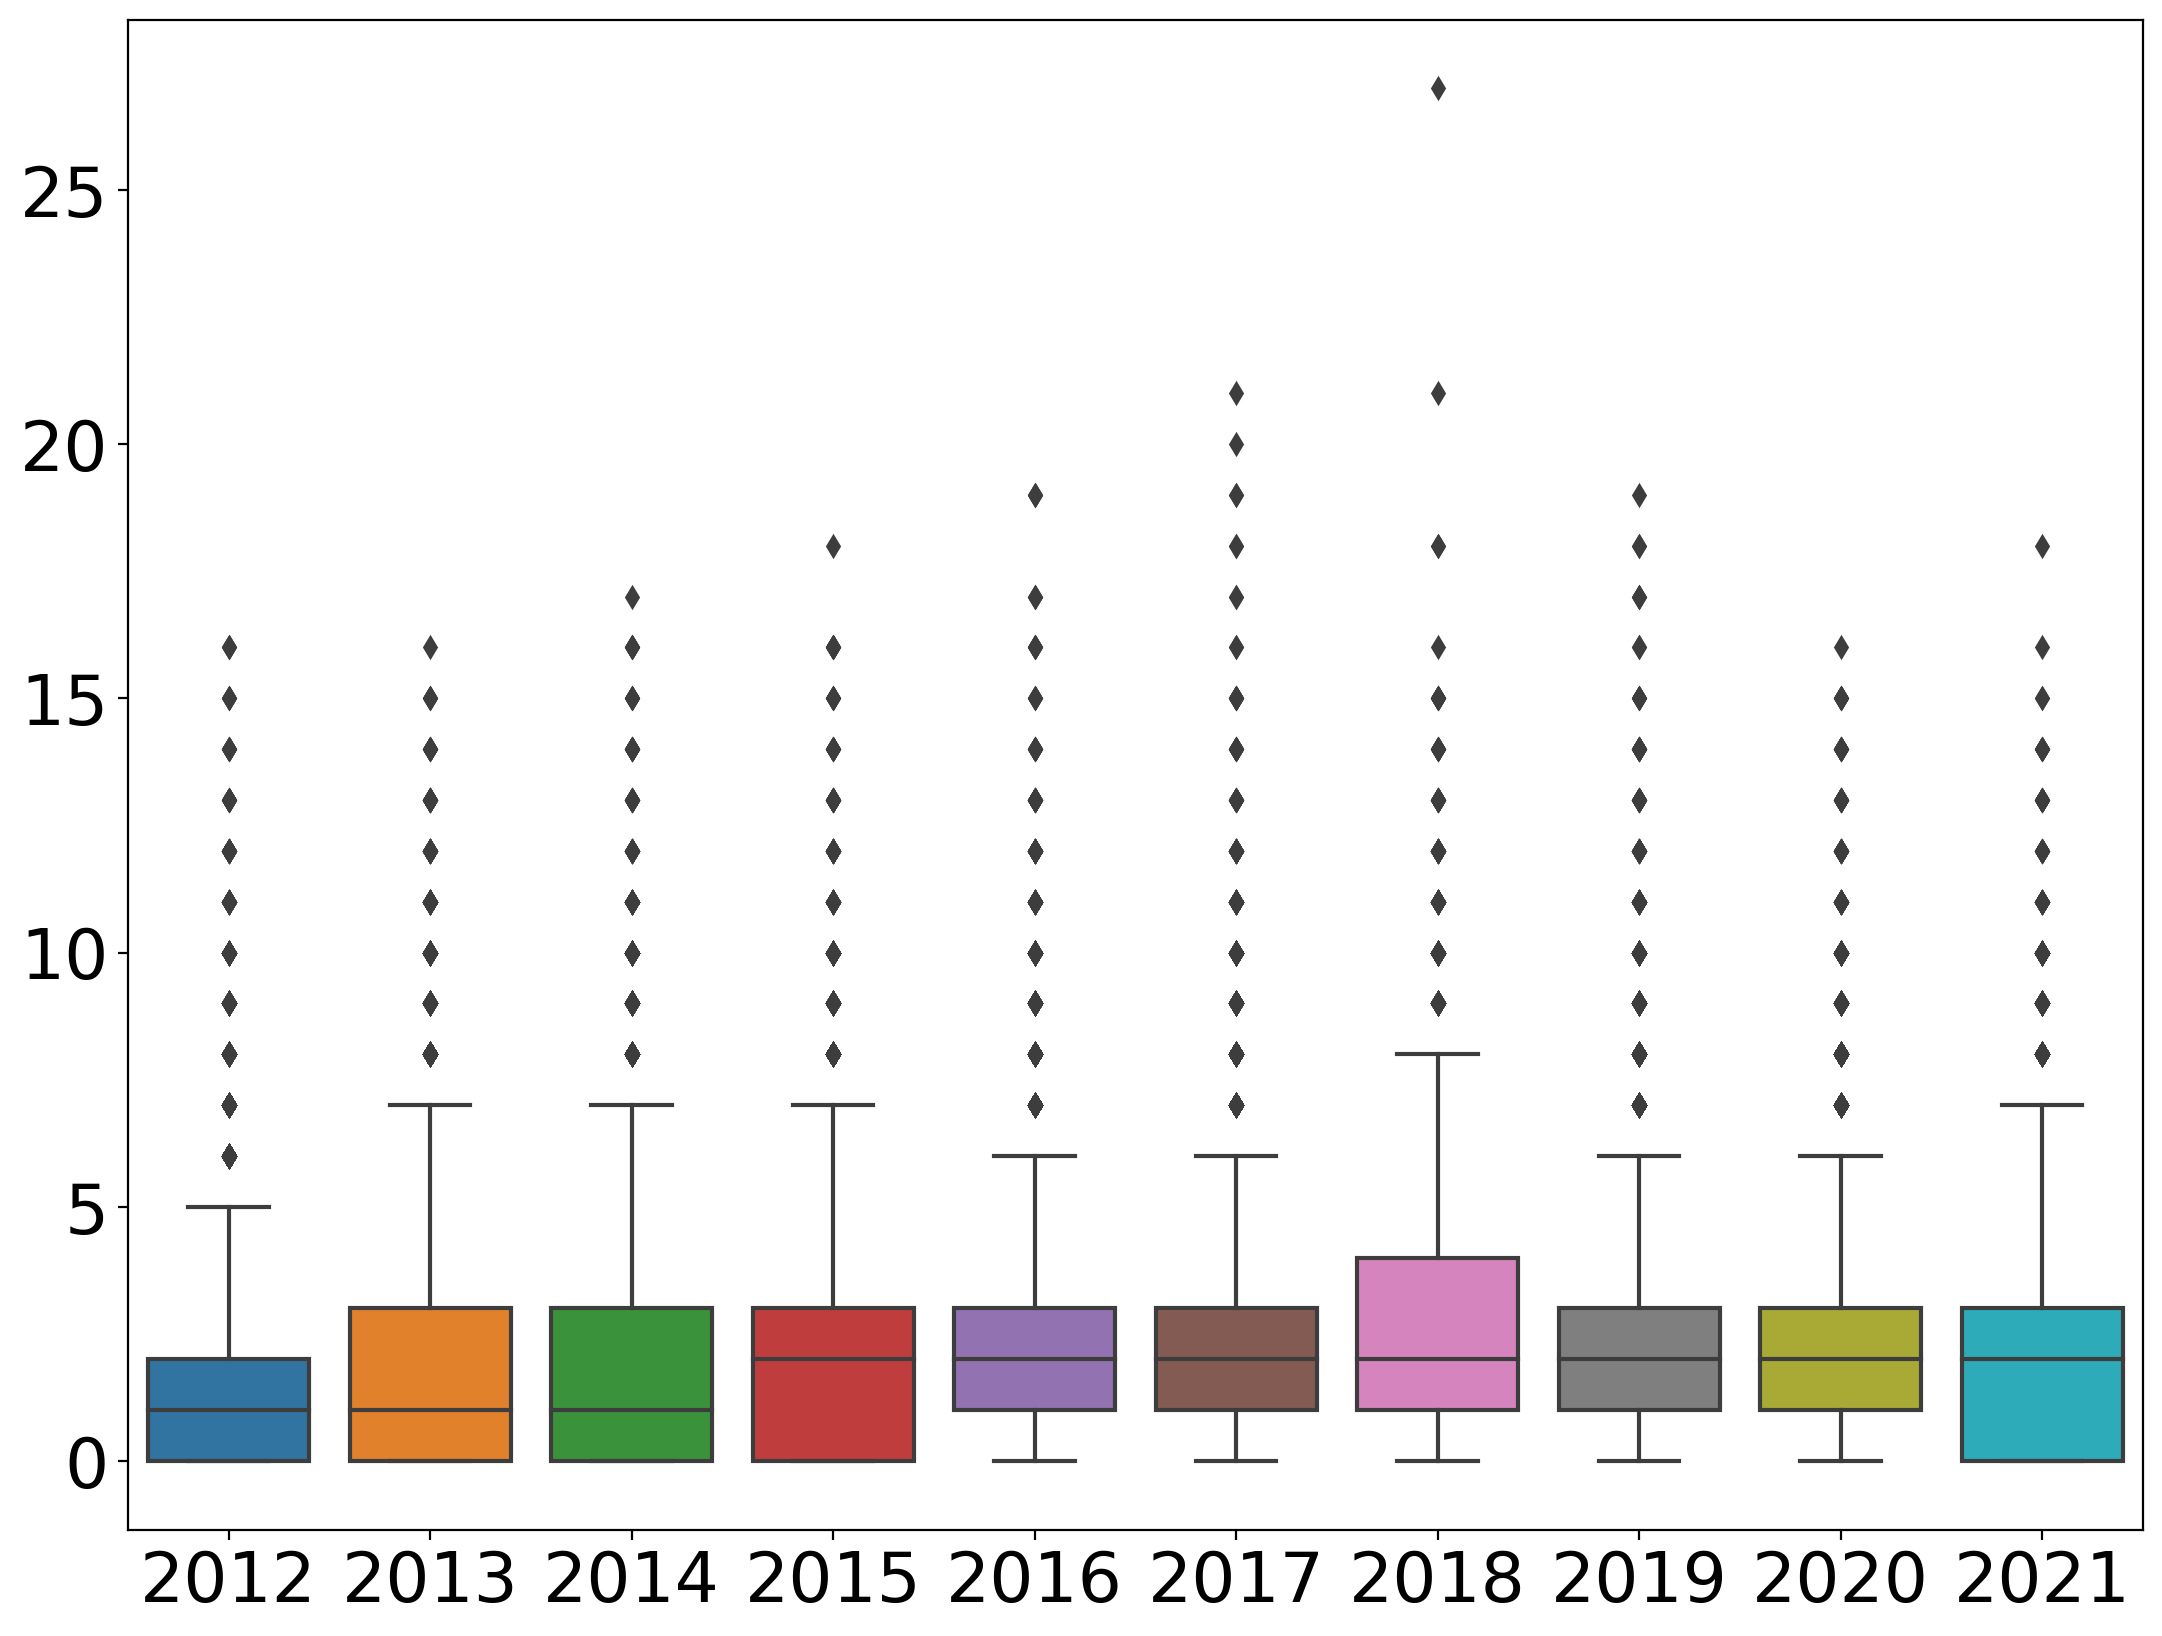

In [26]:
plt.figure(figsize=(13,10), dpi= 200)
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
g2 = sns.boxplot(x='year', y='trackers', data=df_draw_control, notch=False)
g2.set(xlabel = None)
g2.set(ylabel = None)
# add_n_obs(df_draw_control,group_col='year',y='trackers')    

# Decoration
# plt.title('Box Plot of Tracker Numbers in Each year', fontsize=22)
# plt.ylim(10, 40)
plt.savefig("../images/section4/boxplot_control.png",dpi = 600)
plt.show()

Text(0, 0.5, 'Average number of trackers')

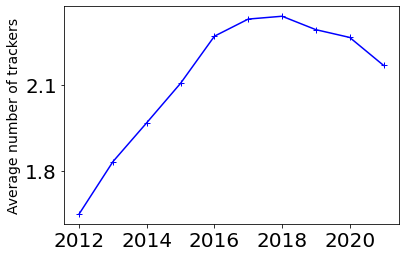

In [28]:
mean_score = [item['trackers'].mean() for item in df_list_control]

# df_draw_control['trackers']
Year = list(range(2012,2022))


plt.plot(Year, mean_score, color='blue', marker='+',label = "non-edu")
plt.yticks(np.arange(0, 2.8, step=0.3))
# plt.title('Average number of trackers', fontsize=14)
# plt.xlabel('Year', fontsize=14)
plt.ylabel('Average number of trackers', fontsize=14)
# plt.axvline(x = 2018, color = 'green', linestyle = ':')